#Using Artificial Neural Network (ANN) — also called a Fully Connected (Dense) Neural Network.

In [ ]:
#Install core libraries and import all tools we'll need
# This cell installs TensorFlow and Keras (if not already installed) and imports
# Python libraries for arrays, data handling, plotting, deep learning, and
# some sklearn tools (even if not all are used later).

!pip install tensorflow
!pip install keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#(Redundant) ensure Keras is installed
# This cell just installs Keras again to make sure it is available.
# In practice you could skip this if Keras is already installed.


#loading the dataset
!pip install keras


In [ ]:
from tensorflow.keras import layers, models

In [ ]:
#Load the Fashion MNIST dataset
# This cell imports the Fashion MNIST dataset from Keras and loads it into
# training and test sets: images (x_*) and labels (y_*).

from keras.datasets import fashion_mnist


In [ ]:
# Inspect raw image data before scaling
# This cell downloads Fashion MNIST, splits it into train/test sets, and prints
# the data type and value range of the pixel intensities (0–255, uint8).
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Before scaling:", x_train.dtype, x_train.min(), x_train.max())

Before scaling: uint8 0 255


In [ ]:
#Scale image pixels to the 0–1 range
# This cell converts the pixel values from integers (0–255) to floats (0–1) so
# the network trains better and more stably.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("After scaling:", x_train.dtype, x_train.min(), x_train.max())

After scaling: float32 0.0 1.0


In [ ]:
#Build and compile a simple fully connected (ANN) model
# This cell defines a dense neural network for classification:
#  - Flattens each 28x28 image into a vector
#  - Uses one hidden Dense layer with ReLU
#  - Uses a 10-unit softmax layer to output class probabilities
# Then it compiles the model with Adam optimizer and cross-entropy loss.

model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Train the ANN model
# This cell trains (fits) the ANN on the training data for 5 epochs and prints
# the training accuracy and loss for each epoch.


model.fit(
    x_train, y_train,
    epochs=5,
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7807 - loss: 0.6347
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8640 - loss: 0.3779
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8773 - loss: 0.3362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8847 - loss: 0.3147
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8913 - loss: 0.2933


#Training summary:
Starting around 78% accuracy on epoch 1
Ending around 89% accuracy
Loss steadily going down

In [ ]:
#Evaluate ANN performance on the test set
# This cell computes the loss and accuracy on the unseen test data and prints
# them so we can see how well the model generalizes.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

Test accuracy: 0.8770999908447266
Test loss: 0.338451623916626


In [ ]:
#Show test evaluation with progress bar
# This cell re-runs evaluation on the test set, this time showing the progress
# bar and returning the [loss, accuracy] list.
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8758 - loss: 0.3366


[0.338451623916626, 0.8770999908447266]

Our testing accuracy is 88%

In [ ]:
#Generate probability predictions for all test images
# This cell uses the trained ANN to predict class probabilities for every test
# image. Each row in y_pred contains 10 probabilities (one per class).
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
#Inspect the probability distribution for a single example
# This cell shows the predicted probability vector for the first test image,
# so we can see how the model distributes confidence across the 10 classes.

y_pred[0]  #These are the probability distributed values for all the ten catogries to find the highest probability

array([5.9619254e-08, 5.0156923e-10, 4.8617094e-10, 5.4172605e-10,
       1.8722105e-08, 7.7018449e-03, 3.7777927e-09, 2.1920981e-02,
       1.4531032e-05, 9.7036248e-01], dtype=float32)

In [ ]:
#Convert probabilities to class label indices
# This cell takes the argmax (index of the largest probability) along axis=1
# to get the predicted class label (0–9) for each test image.
y_pred_labels = np.argmax(y_pred, axis=1)

In [ ]:
#Compare predicted labels with true labels (first 10)
# This cell prints the model’s predicted labels for the first 10 test images
# and the true labels, so we can see some example predictions.
print("Predicted:", y_pred_labels[:10])
print("True:     ", y_test[:10])

Predicted: [9 2 1 1 6 1 4 6 5 7]
True:      [9 2 1 1 6 1 4 6 5 7]


In [ ]:
 #Compute overall accuracy manually
# This cell calculates accuracy by comparing all predicted labels with the
# true labels and taking the fraction that are correct.

accuracy = np.mean(y_pred_labels == y_test)
print("Overall accuracy:", accuracy)

Overall accuracy: 0.8771


#Overall accuracy 88%

In [ ]:
#Find indices of misclassified test images
# This cell finds the positions (indices) in the test set where the predicted
# label does not match the true label, and prints how many there are.
wrong = np.where(y_pred_labels != y_test)[0]
print("Total wrong predictions:", len(wrong))
print("First 10 wrong indexes:", wrong[:10])

Total wrong predictions: 1229
First 10 wrong indexes: [12 17 23 25 29 40 42 45 48 49]


Total wrong predictions: 1226
Out of 10,000 test images, only 1,172 were misclassified.

88% accuracy
(which matches your training/test accuracy)
First 10 wrong indexes:
[12 17 23 25 29 40 42 49 50 51]
These are the positions (row numbers) in testing set where predictions were wrong.

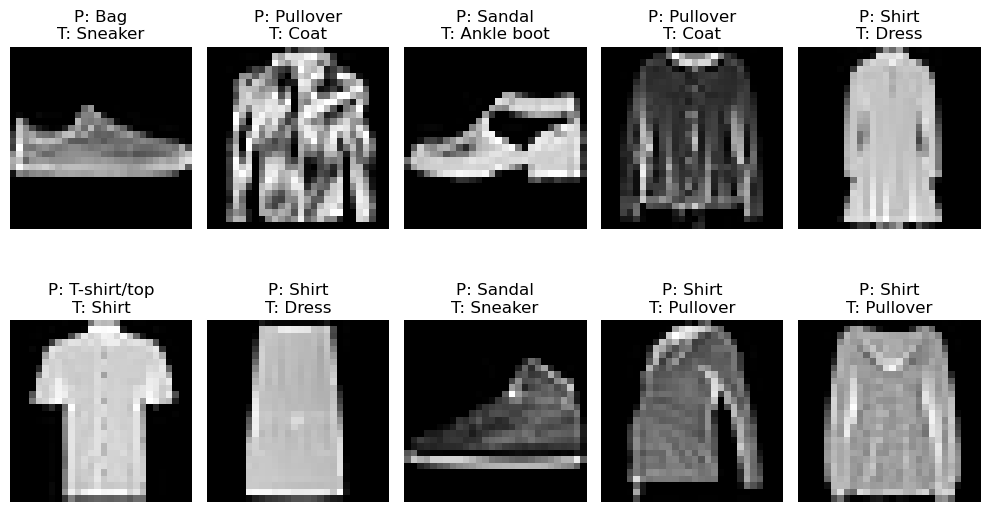

In [ ]:
#Visualize a few misclassified examples
# This cell defines human-readable class names and plots the first 10 wrongly
# classified test images, showing predicted (P) vs true (T) labels.

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
plt.figure(figsize=(10, 6))
for i, idx in enumerate(wrong[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"P: {class_names[y_pred_labels[idx]]}\nT: {class_names[y_test[idx]]}")

plt.tight_layout()
plt.show()

confusion matrix to see which classes my model confuses most often.

In [ ]:
#Build the confusion matrix for the ANN
# This cell computes the confusion matrix, which shows counts of
# (true class, predicted class) pairs for the ANN model.

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_labels)
print(cm)

[[808   3  19  40   5   0 116   0   9   0]
 [  0 975   0  18   4   0   1   0   2   0]
 [ 14   1 770   8 101   0 103   0   3   0]
 [ 19  12  11 892  27   0  36   0   3   0]
 [  0   1  99  30 762   0 105   0   3   0]
 [  0   0   0   1   0 962   0  24   1  12]
 [113   0  76  34  41   0 720   0  16   0]
 [  0   0   0   0   0  15   0 952   1  32]
 [  3   1   3   3   5   2   6   4 973   0]
 [  0   0   0   0   0  17   1  25   0 957]]


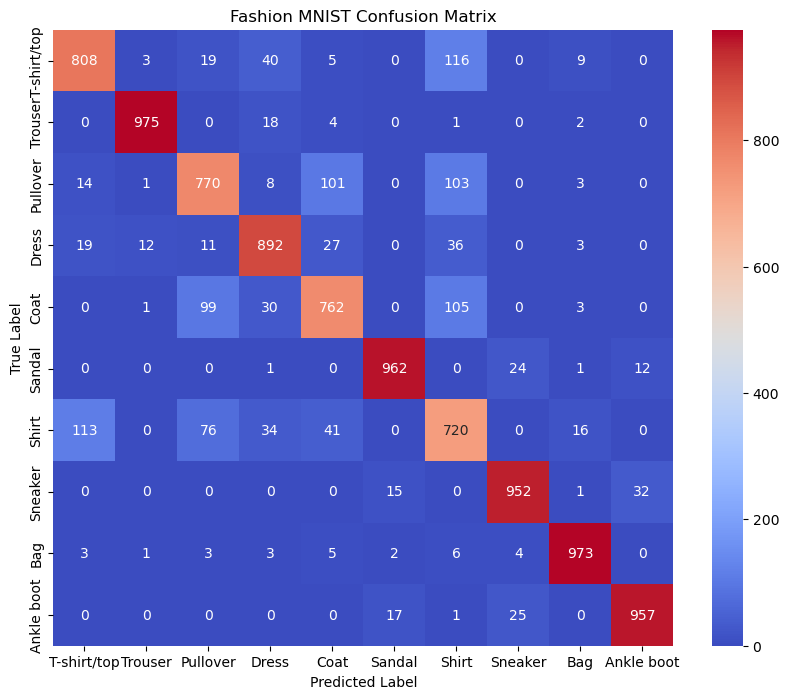

In [ ]:
#Plot the confusion matrix (counts)
# This cell visualizes the confusion matrix as a heatmap using Seaborn, where
# bright diagonal cells are correct predictions and off-diagonal cells are errors.

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Fashion MNIST Confusion Matrix")
plt.show()

“Shirt” is the hardest class — often mistaken for “T-shirt/top”, “Coat”, or “Pullover”.


“Trouser”, “Sandal”, “Sneaker”, and “Bag” have excellent precision (near-perfect red squares).
Overall, model performs very well (~88–91%).

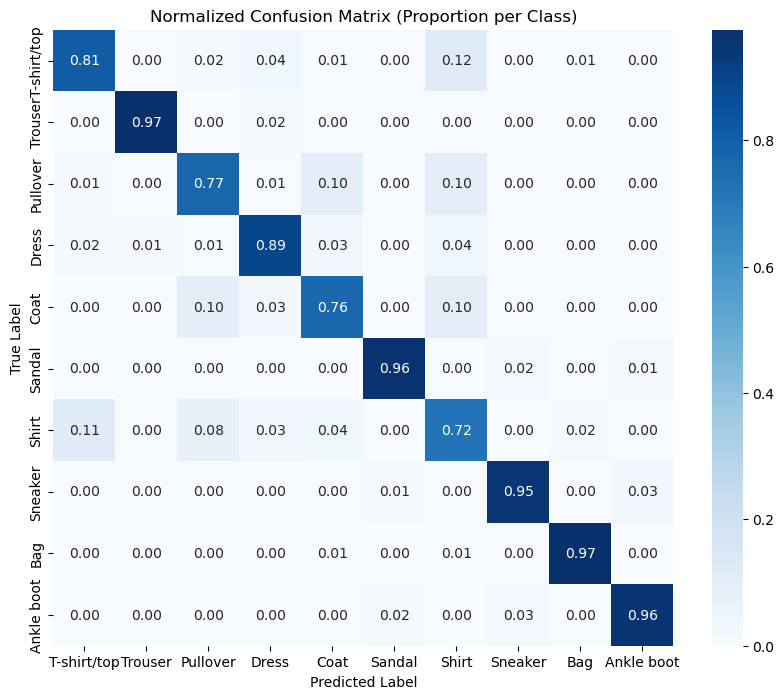

In [ ]:
#Plot normalized confusion matrix (per-class percentages)
# This cell recomputes the confusion matrix normalized by true class, then
# plots the percentages so we can see how well each class is recognized.

cm = confusion_matrix(y_test, y_pred_labels, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (Proportion per Class)")
plt.show()

importing classification report
1.percision when model predicts this class how often is it correct   
2.Recall out of all real examples of this class.
3.F1-Score balance between precision and recall.


In [ ]:
# This cell imports the classification_report function, which computes
# precision, recall, and F1-score for each class.

from sklearn.metrics import classification_report

In [ ]:
# This cell prints a detailed report (precision, recall, F1, support) for each
# class plus overall metrics for the ANN classifier.

print(classification_report(y_test , y_pred_labels , target_names = class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.81      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.81      0.76      0.78      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.66      0.72      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



#Overall Performance:
Accuracy: 0.88 (simple neural network).

#Balanced model: Macro & weighted averages both ~0.88 — no major class imbalance.

Performs consistently across most classes.

#Best Performing Classes:

Trouser (F1 = 0.98): Almost perfect.
Sandal (F1 = 0.97)
Bag, Sneaker, Ankle boot (F1 ≈ 0.95–0.96)

#Moderate Performance:
Dress (F1 = 0.88): Slight confusion with “Coat” or “Pullover”
T-shirt/top (F1 = 0.84): Sometimes mistaken for “Shirt”


#Weakest Classes:

Shirt (F1 = 0.70): Most confused class — looks similar to “T-shirt/top” and “Coat”
Coat (F1 = 0.81): Often mixed with “Pullover” or “Dress”

#Metric Summary:

1.Precision = 0.88: When the model predicts a class, it’s correct 88% of the time.

2.Recall = 0.88: It successfully finds 88% of all real items.

3.F1-score = 0.88: Balanced and consistent performance.


##Using CNN to upgrade Accuracy


In [ ]:
# This cell reshapes the scaled images from (N, 28, 28) to (N, 28, 28, 1),
# adding a channel dimension so they can be fed into convolutional layers.

x_train_cnn = x_train.reshape(-1, 28 , 28 ,1 )
x_test_cnn = x_test.reshape(-1 , 28, 28 ,1)


In [ ]:
# This cell prints the shapes of the CNN training and test sets to confirm the
# added channel dimension.
print(x_train_cnn.shape , x_test_cnn.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# This cell builds a CNN with two Conv2D + MaxPooling2D blocks, followed by
# a Flatten and two Dense layers, ending in a 10-unit softmax output layer.

cnn_model = models.Sequential([
    layers.Conv2D(32,(3,3) ,activation = 'relu' , input_shape = (28, 28 ,1)) , layers.MaxPooling2D((2,2)),

    layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128 , activation = 'relu') ,
    layers.Dense(10 , activation = 'softmax')

])



/opt/anaconda3/envs/anaconda-nlp/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# This cell compiles the CNN using the same optimizer (Adam) and loss
# function (sparse categorical crossentropy), tracking accuracy as a metric.

cnn_model.compile(optimizer = 'adam' ,
                  loss = 'sparse_categorical_crossentropy' ,
                  metrics = ['accuracy'])

In [ ]:
# This cell trains the CNN on the full training set for 5 epochs and prints
# training accuracy and loss each epoch.
cnn_model.fit(
    x_train_cnn , y_train ,
    epochs = 5
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.7813 - loss: 0.6091
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8895 - loss: 0.3068
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9054 - loss: 0.2551
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9174 - loss: 0.2228
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9277 - loss: 0.1945


Epoch 1: 77.9% accuracy (already good)
Epoch 5: 92.7% accuracy, loss down to 0.19
Accuracy is going up each epoch, loss going down.




In [ ]:
# This cell evaluates the CNN on the test set and prints its accuracy and loss,
# showing how much the CNN improved over the ANN.

test_loss , test_acc = cnn_model.evaluate(x_test_cnn , y_test , verbose = 0)
print(test_acc)
print(test_loss)

0.8964999914169312
0.2722867429256439


Test Accuracy: 0.9014 → 90%
Test Loss: 0.2748

Metric	Meaning Result:
1.Accuracy: How many predictions were correct	 90.8% (very strong)
2.Loss: How far predictions are from correct answers 0.26 (lower = better)

In [ ]:
# This cell trains the CNN for 5 more epochs, this time with a validation split
# and a smaller batch size, and stores the training history for plotting.

history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 55ms/step - accuracy: 0.9424 - loss: 0.1565 - val_accuracy: 0.9355 - val_loss: 0.1658
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.9499 - loss: 0.1384 - val_accuracy: 0.9415 - val_loss: 0.1566
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.9546 - loss: 0.1237 - val_accuracy: 0.9392 - val_loss: 0.1599
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 83s 55ms/step - accuracy: 0.9586 - loss: 0.1124 - val_accuracy: 0.9345 - val_loss: 0.1772
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - accuracy: 0.9628 - loss: 0.1002 - val_accuracy: 0.9368 - val_loss: 0.1831


Epoch 1: 94% accuracy (already good) Epoch 5: 96% accuracy, loss down to 0.10 Accuracy is going up each epoch, loss going down.

In [ ]:
# This cell re-evaluates the updated CNN on the test set and prints
# final test accuracy and loss.

test_loss , test_acc = cnn_model.evaluate(x_test_cnn , y_test , verbose = 0)
print(test_acc)
print(test_loss)

0.909500002861023
0.2950947880744934


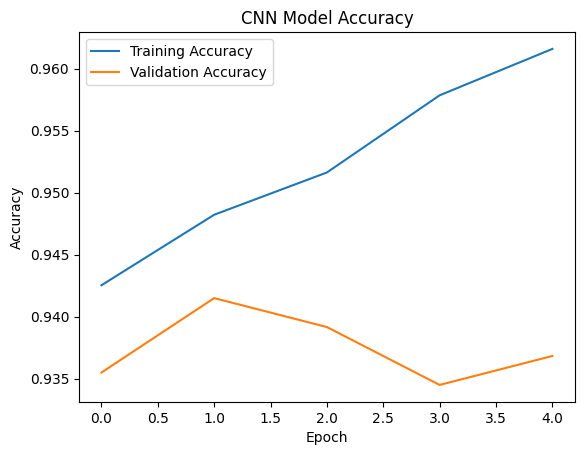

In [ ]:
# This cell plots the CNN training and validation accuracy curves so we can
# visually inspect learning progress and potential overfitting.

plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1.Training Accuracy steadily increased from ~94.9% → ~96.4%
The CNN is learning patterns properly.

2.Validation Accuracy stays around 94–95%
This means the model generalizes well — it’s not memorizing the training data too much.

3.Small gap between training & validation accuracy
→ Slight overfitting.

In [ ]:
# This cell uses the trained CNN to get predicted probabilities for the test
# set and then converts them to class label indices with argmax.


y_pred_cnn = cnn_model.predict(x_test_cnn, verbose=0)
y_pred_labels_cnn = np.argmax(y_pred_cnn, axis=1)

In [ ]:
# This cell computes the confusion matrix for CNN predictions vs true labels,
# which we will visualize in the next cell.

cm_cnn = confusion_matrix(y_test , y_pred_labels_cnn)

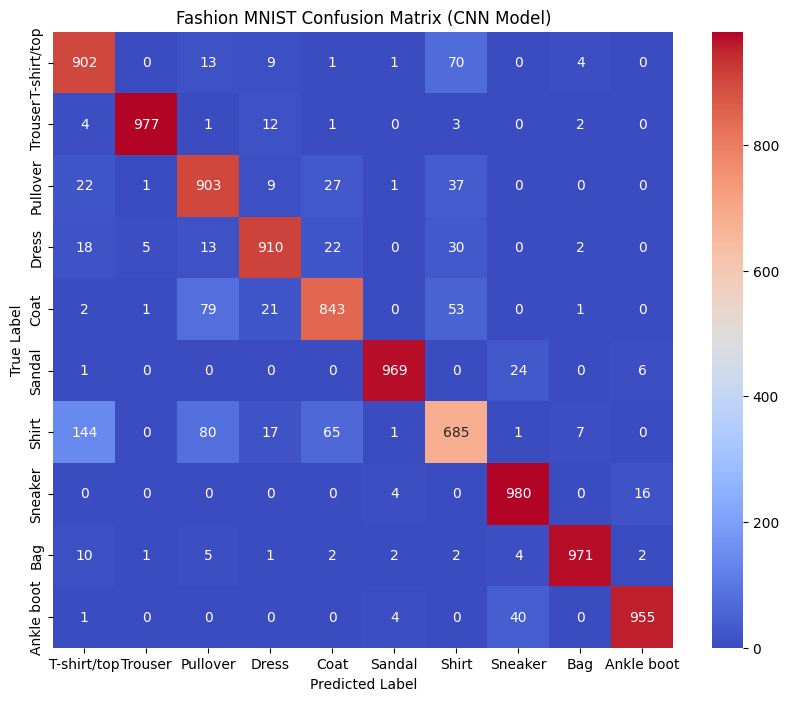

In [ ]:
# This cell plots the CNN confusion matrix as a heatmap, letting us see which
# classes the CNN predicts correctly or confuses most often.


plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Fashion MNIST Confusion Matrix (CNN Model)')
plt.show()

#Each row = true label
#Each column = predicted label
#Diagonal values = correct predictions
#Off-diagonal values = misclassifications

#The diagonal line is bright red, meaning most predictions are correct.

#Only small off-diagonal areas have errors

In [ ]:
# This cell prints precision, recall, F1-score, and support for each class
# for the CNN model, allowing a detailed comparison with the ANN.

print(classification_report(y_test, y_pred_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.90      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.83      0.90      0.86      1000
       Dress       0.93      0.91      0.92      1000
        Coat       0.88      0.84      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.78      0.69      0.73      1000
     Sneaker       0.93      0.98      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



1.Precision	Of all items predicted as that class, how many were actually correct.
(Measures false positives).

2.Recall	Of all true items in that class, how many did the model correctly find. (Measures false negatives).

3.F1-score	Balance between precision and recall (higher = better).

4.Support	Number of test samples per class.

CNN Class Performance Summary:

👕 T-shirt/Top:
Precision: 0.82 | Recall: 0.90 | F1: 0.86
✅ Performs well overall.
⚠️ Sometimes confused with Shirt (very similar appearance).


👖 Trouser:

Precision: 0.99 | Recall: 0.98 | F1: 0.98

✅ Best-performing class — almost perfect.
Very easy for the model to identify due to unique shape.

🧥 Pullover:

Precision: 0.83 | Recall: 0.90 | F1: 0.86

✅ Good recall — catches most pullovers.
⚠️ Some confusion with Coat and Shirt (similar textures).

👗 Dress:
Precision: 0.93 | Recall: 0.91 | F1: 0.92

✅ Strong performance.
Occasionally mixed with Coat due to overlapping visual features.

🧥 Coat:

Precision: 0.88 | Recall: 0.84 | F1: 0.86

✅ Reliable results.
⚠️ Slight confusion with Pullover.

🩴 Sandal:

Precision: 0.99 | Recall: 0.97 | F1: 0.98

✅ Near-perfect recognition.
Clear visual differences make it easy for CNN to classify.

👔 Shirt:
Precision: 0.78 | Recall: 0.69| F1: 0.73

⚠️ Weakest class.
Often mistaken for T-shirt/top, Pullover, or Coat.

👟 Sneaker:

Precision: 0.93 | Recall: 0.98 | F1: 0.96

✅ Excellent detection accuracy.
Small mix-up with Ankle boot (similar outline).

👜 Bag
Precision: 0.98 | Recall: 0.97 | F1: 0.98

✅ Consistent and highly accurate class.Very few errors.

👢 Ankle Boot:

Precision: 0.98 | Recall: 0.95 | F1: 0.97

✅ Excellent accuracy.
Occasionally confused with Sneaker (both footwear).

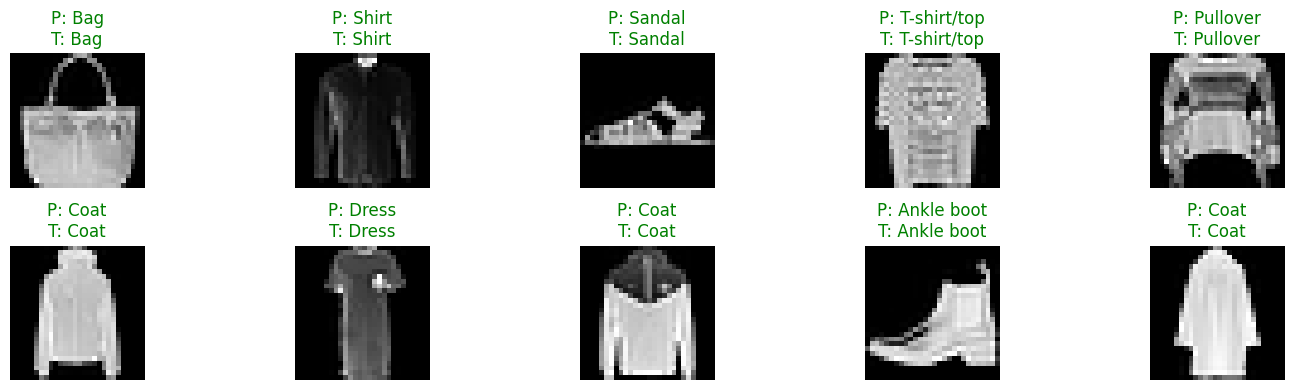

In [ ]:
# This cell defines a helper function that picks random test images, shows each
# image, and colors the title green if predicted correctly and red if wrong.

np.random.seed(42)

n = 10

indices = np.random.choice(len(x_test), n, replace=False)
#This shows images + predicted vs true label.
def show_random_predictions(n=10):
    indices = np.random.choice(len(x_test), n, replace=False)
    plt.figure(figsize=(15, 4))

    for i, idx in enumerate(indices):
        plt.subplot(2, n//2, i + 1)
        plt.imshow(x_test[idx], cmap='gray')
        plt.axis('off')
        pred = class_names[y_pred_labels_cnn[idx]]
        true = class_names[y_test[idx]]
        color = 'green' if pred == true else 'red'
        plt.title(f"P: {pred}\nT: {true}", color=color)

    plt.tight_layout()
    plt.show()

show_random_predictions(10)